In [2]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble

In [3]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Run Bike RF model for iputation

In [4]:
bdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_data.csv')
bdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0.0,671,2018,1,65.478571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,671,2018,2,60.928571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,671,2018,3,48.907143,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,671,2018,4,52.942857,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,671,2018,5,64.071429,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bdata0.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'ID', 'year', 'month', 'AASHTO_MADT',
       'latitude', 'longitude', 'geometry', 'min_dist_to_CBD',
       'Commercial Area ', 'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area',
       'Distance to water area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'pct_white',
       'pct_African_American', 'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employme

In [6]:
# lets keep the data that we need for model tunning
bdata=bdata0.drop(['Unnamed: 0_x','Unnamed: 0.1', 'Unnamed: 0', 'ID', 'year', 'latitude', 'longitude', 'geometry','grass Area ', 'Distance to grass area','grass Area ','education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'Distance to grass area', 'Total Commuter','Name', 'name', 'highway', 'Bicycle_Fa', 'Unnamed: 0_y', 'edgeUID',
       'osmId', 'edge_uid', 'osmId.1', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'date',
       'days_in_month',],axis=1)
bdata.columns

Index(['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'r

In [7]:
bdata['AASHTO_MADT'].describe()

count    5329.000000
mean      445.335192
std       558.082590
min         5.235714
25%       100.642857
50%       211.828571
75%       602.414286
max      5235.757143
Name: AASHTO_MADT, dtype: float64

In [8]:
bdata0.groupby(['month'])['ID'].count()

month
1     407
2     427
3     419
4     445
5     472
6     477
7     477
8     460
9     464
10    448
11    399
12    434
Name: ID, dtype: int64

In [25]:
# split data into X dataframe and Y dataframe:
X_data1 = bdata.drop("AASHTO_MADT", axis=1)
Y_data1 = bdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data1.shape} Y_data.shape: {Y_data1.shape}")

X_data.shape: (5329, 50) Y_data.shape: (5329,)


In [32]:
features1 = bdata.drop("AASHTO_MADT", axis=1)
feature_list1 = list(features1.columns)

In [27]:
X1 = np.asarray(X_data1)
Y1 = np.asarray(Y_data1)
print(f"X.shape: {X1.shape} Y.shape: {Y1.shape}")

X.shape: (5329, 50) Y.shape: (5329,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X1, Y1, test_size=0.2,random_state=94704)

In [32]:
#https://github.com/ray-project/tune-sklearn?fbclid=IwAR11a7ctTD3l8kzS3zyyZJOn8p_KnAna8p0GZ1TnPRdeO3e0U9Fo8ZOFGQ0
from tune_sklearn import TuneGridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [90]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-07 22:34:28,345	WARNING util.py:244 -- The `reset` operation took 1.489 s, which may be a performance bottleneck.
2023-05-07 22:34:28,351	WARNING util.py:244 -- The `start_trial` operation took 1.496 s, which may be a performance bottleneck.
2023-05-07 22:34:30,025	WARNING util.py:244 -- The `reset` operation took 1.381 s, which may be a performance bottleneck.
2023-05-07 22:34:30,031	WARNING util.py:244 -- The `start_trial` operation took 1.389 s, which may be a performance bottleneck.
2023-05-07 22:34:31,334	WARNING util.py:244 -- The `reset` operation took 1.011 s, which may be a performance bottleneck.
2023-05-07 22:34:31,339	WARNING util.py:244 -- The `start_trial` operation took 1.018 s, which may be a performance bottleneck.
2023-05-07 22:34:32,558	WARNING util.py:244 -- The `reset` operation took 0.944 s, which may be a performance bottleneck.
2023-05-07 22:34:32,563	WARNING util.py:244 -- The `start_trial` operation took 0.950 s, which may be a performance bottleneck.


C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
2023-05-07 22:44:11,172	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_Inner.restore_from_object() (pid=8932, ip=127.0.0.1, repr=<ray.tune.trainable.util._Trainable object at 0x000001C7F3747DC0>)
  File "python\ray\_raylet.pyx", line 819, in ray._raylet.execu

2023-05-07 22:44:24,460	WARNING util.py:244 -- The `reset` operation took 1.593 s, which may be a performance bottleneck.
2023-05-07 22:44:24,465	WARNING util.py:244 -- The `start_trial` operation took 1.599 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:44:25,167	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_9e6bf0740f3d4aed905ce12d191b4b92
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:44:25,168	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 82, '_timesteps_total': None, '_time_total': 61.92794418334961, '_episodes_total': None}
2023-05-07 22:44:26,506	WARNING util.py:244 -- The `reset` operation took 1.443 s, which may be a performance bottleneck.
2023-05-07 22:44:26,513	WARNING util.py:244 -- The `start_trial` operation took 1.450 s, which may be a performance

2023-05-07 22:44:46,466	WARNING util.py:244 -- The `reset` operation took 1.495 s, which may be a performance bottleneck.
2023-05-07 22:44:46,472	WARNING util.py:244 -- The `start_trial` operation took 1.503 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000001ECF7DC7DC0> pid=20452) 2023-05-07 22:44:47,257	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_a8218b9768ac4ecaa787d73090c7b70e
(<ray.tune.trainable.util._Trainable object at 0x000001ECF7DC7DC0> pid=20452) 2023-05-07 22:44:47,258	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 88, '_timesteps_total': None, '_time_total': 65.10251998901367, '_episodes_total': None}
2023-05-07 22:44:48,712	WARNING util.py:244 -- The `reset` operation took 1.572 s, which may be a performance bottleneck.
2023-05-07 22:44:48,718	WARNING util.py:244 -- The `start_trial` operation took 1.580 s, which may be a performance

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:07,801	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_9d4f31007a72466baea47badb8c74cde
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:07,801	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 84, '_timesteps_total': None, '_time_total': 60.91970634460449, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:07,752	INFO trainable.py:766 -- Restored on 127.

2023-05-07 22:45:20,253	WARNING util.py:244 -- The `reset` operation took 0.852 s, which may be a performance bottleneck.
2023-05-07 22:45:20,262	WARNING util.py:244 -- The `start_trial` operation took 0.863 s, which may be a performance bottleneck.
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:20,770	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_2fe7a11be9004cf7a38e17e616711e65
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:20,770	INFO trainable.py:775 -- Current state after restori

2023-05-07 22:45:28,937	WARNING util.py:244 -- The `reset` operation took 0.884 s, which may be a performance bottleneck.
2023-05-07 22:45:28,945	WARNING util.py:244 -- The `start_trial` operation took 0.893 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:29,318	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_182031c6d6e94250b5a4c76395333c9e
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:29,319	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 87, '_timesteps_total': None, '_time_total': 62.15400266647339, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000017F15DC7DC0> pid=32304) 2023-05-07 22:45:29,481	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_1e093b86099f44a9b810a

(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:45:37,891	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_78101baae6444ba0b140d40f48fb4cbc
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:45:37,891	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 87, '_timesteps_total': None, '_time_total': 60.82410764694214, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:38,207	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_f0719672ef354cc2a96ea7609fabf1e4
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:38,207	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 63.86990284919739, '

In [91]:
tune_model.best_params_

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [29]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=bdata.loc[bdata['month']!=i]
    test=bdata.loc[bdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 72.93271434012297	Score Loss: 85.96709344176989
	Train RMSE: 182.9734843555483	Score RMSE: 183.21223083160115
	Train MAPE: 412.5778926532781	Score MAPE: 492.6924535392602
	Train R2:   0.8950675027337895	Score R2: 0.8449299307413914

	3-VOLUME SCORES: LOW (n=252), MED (n=105), HIGH (n=50), TOTAL IN Month (n=407)
	Low Loss: 54.31569906206793	Med Loss: 107.31452151903274	High Loss: 200.6605221532158
	Low RMSE: 169.58154260788848	Med RMSE: 137.89927362467108	High RMSE: 297.25285360259335
	Low MAPE: 240.04769102875377	Med MAPE: 45.733327997508255	High MAPE: 28.34514010557823
	Low R2:   -4.253964773282613	Med R2: 0.46716758522099966	High R2: 0.46716758522099966


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 71.38969735790346	Score Loss: 118.84265967222343
	Train RMSE: 181.25030983203044	Score RMSE: 226.94312149636949
	Train MAPE: 411.4118699531954	Score MAPE: 459.24882991230527
	Train R2:   0.8953244016075892	Score R2: 0.8179993582985631

	3-VOLUME SCORES: LOW (n=265), MED (n=108), HIGH (n=54), TOTAL IN Month (n=427)
	Low Loss: 50.960471041788836	Med Loss: 137.15859042592479	High Loss: 415.33635348084243
	Low RMSE: 137.1523933856203	Med RMSE: 190.01125699197027	High RMSE: 492.68237063003437
	Low MAPE: 215.1561434128904	Med MAPE: 50.453379438185486	High MAPE: 32.236484118251916
	Low R2:   -2.4143725831154814	Med R2: 0.24750023099892682	High R2: 0.24750023099892682


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 73.40636825968208	Score Loss: 86.73764486158589
	Train RMSE: 184.9375679537496	Score RMSE: 177.88607224428978
	Train MAPE: 419.0779567147069	Score MAPE: 426.7860824229307
	Train R2:   0.8931274337686832	Score R2: 0.8472089202415919

	3-VOLUME SCORES: LOW (n=255), MED (n=120), HIGH (n=43), TOTAL IN Month (n=419)
	Low Loss: 47.69736807146827	Med Loss: 131.5249632331343	High Loss: 195.09830168048563
	Low RMSE: 152.5626412084303	Med RMSE: 184.75278458991932	High RMSE: 273.9587275615756
	Low MAPE: 196.28365557404993	Med MAPE: 48.28842221928243	High MAPE: 30.365085150405502
	Low R2:   -3.7472536958198965	Med R2: -0.04374417310411016	High R2: -0.04374417310411016


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 72.4547238779258	Score Loss: 127.26052948394988
	Train RMSE: 183.3305775661517	Score RMSE: 248.12879251115004
	Train MAPE: 422.1124285602037	Score MAPE: 362.4936559197734
	Train R2:   0.8928750419854036	Score R2: 0.7841606235633949

	3-VOLUME SCORES: LOW (n=277), MED (n=118), HIGH (n=50), TOTAL IN Month (n=445)
	Low Loss: 74.04520783612436	Med Loss: 178.80224454107062	High Loss: 300.434963878098
	Low RMSE: 186.67747980079335	Med RMSE: 277.43227440324256	High RMSE: 416.23028258056706
	Low MAPE: 196.80544100380538	Med MAPE: 52.56462151535324	High MAPE: 35.472583240454334
	Low R2:   -4.951209911568153	Med R2: -0.8986534244137521	High R2: -0.8986534244137521


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 70.42478437088293	Score Loss: 118.68708532960403
	Train RMSE: 177.32293138804096	Score RMSE: 254.86789337001773
	Train MAPE: 418.7112556603009	Score MAPE: 387.4066860577822
	Train R2:   0.8984593654841863	Score R2: 0.8026543674351105

	3-VOLUME SCORES: LOW (n=286), MED (n=126), HIGH (n=60), TOTAL IN Month (n=472)
	Low Loss: 58.21244548154764	Med Loss: 149.52637135233968	High Loss: 342.1870346242614
	Low RMSE: 164.13761657063552	Med RMSE: 228.62160843621558	High RMSE: 522.3199651154755
	Low MAPE: 194.15946332053431	Med MAPE: 53.82439613913876	High MAPE: 37.84439871072189
	Low R2:   -3.5081061118011263	Med R2: -0.23540124327324752	High R2: -0.23540124327324752


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 72.48232037877268	Score Loss: 113.9936332934276
	Train RMSE: 180.95487127071107	Score RMSE: 252.09242608981486
	Train MAPE: 414.9797610922928	Score MAPE: 405.12928241080334
	Train R2:   0.8926993680128733	Score R2: 0.8285624319138148

	3-VOLUME SCORES: LOW (n=265), MED (n=135), HIGH (n=77), TOTAL IN Month (n=477)
	Low Loss: 50.095052679548274	Med Loss: 129.40123001294705	High Loss: 306.8910138848938
	Low RMSE: 197.99657066004917	Med RMSE: 188.36632222370204	High RMSE: 443.34735123225477
	Low MAPE: 190.53383677049268	Med MAPE: 44.87261691015351	High MAPE: 39.62678799017538
	Low R2:   -5.376397448575722	Med R2: 0.13284576764589828	High R2: 0.13284576764589828


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 70.61888740229584	Score Loss: 130.90831657047065
	Train RMSE: 173.5801821630488	Score RMSE: 326.6476028474154
	Train MAPE: 415.17513130054056	Score MAPE: 375.0176022336753
	Train R2:   0.8981585892532563	Score R2: 0.7685926612405947

	3-VOLUME SCORES: LOW (n=264), MED (n=129), HIGH (n=84), TOTAL IN Month (n=477)
	Low Loss: 54.271414837230054	Med Loss: 120.67061169711322	High Loss: 387.4893402161685
	Low RMSE: 226.1493029351697	Med RMSE: 175.18006589308354	High RMSE: 630.8970754242218
	Low MAPE: 188.05118120310513	Med MAPE: 43.61396611490452	High MAPE: 37.91167859273272
	Low R2:   -7.50031109324034	Med R2: 0.20562502723531506	High R2: 0.20562502723531506


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 71.69924083000622	Score Loss: 115.97176382940428
	Train RMSE: 174.74633194902628	Score RMSE: 288.6925863535188
	Train MAPE: 415.28082565772735	Score MAPE: 395.3198285027677
	Train R2:   0.8977797020416891	Score R2: 0.8112211713066899

	3-VOLUME SCORES: LOW (n=261), MED (n=123), HIGH (n=74), TOTAL IN Month (n=460)
	Low Loss: 41.59508440620298	Med Loss: 115.5519763682601	High Loss: 369.14993490840993
	Low RMSE: 158.92374539278188	Med RMSE: 171.88710070876954	High RMSE: 611.272710387092
	Low MAPE: 183.3548344199212	Med MAPE: 47.24102269591276	High MAPE: 39.215813625974164
	Low R2:   -3.5000851638920407	Med R2: 0.1873177770884933	High R2: 0.1873177770884933


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 71.5189946897604	Score Loss: 118.3310707406591
	Train RMSE: 175.81501056646403	Score RMSE: 279.70347931749234
	Train MAPE: 415.15823680714306	Score MAPE: 433.0707968113161
	Train R2:   0.8994390701105621	Score R2: 0.7781868716474629

	3-VOLUME SCORES: LOW (n=263), MED (n=136), HIGH (n=64), TOTAL IN Month (n=464)
	Low Loss: 55.25887006652967	Med Loss: 140.69607898858408	High Loss: 331.6893350491956
	Low RMSE: 222.63011290906485	Med RMSE: 211.19833391123476	High RMSE: 518.3941205135588
	Low MAPE: 218.71877484793168	Med MAPE: 55.22917285968907	High MAPE: 43.203761203867494
	Low R2:   -7.635788241140835	Med R2: -0.03335501455884038	High R2: -0.03335501455884038


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 72.96256406031472	Score Loss: 106.91753759912307
	Train RMSE: 183.021886929045	Score RMSE: 232.84863037798584
	Train MAPE: 417.4122303299113	Score MAPE: 375.07180477987924
	Train R2:   0.8907761220871384	Score R2: 0.8498067528197513

	3-VOLUME SCORES: LOW (n=258), MED (n=123), HIGH (n=67), TOTAL IN Month (n=448)
	Low Loss: 53.47339086559841	Med Loss: 90.88723095001367	High Loss: 342.1461581228517
	Low RMSE: 155.21797080862103	Med RMSE: 128.02812031073844	High RMSE: 489.56069278852465
	Low MAPE: 177.91797776022688	Med MAPE: 43.877854347849436	High MAPE: 39.20026029182148
	Low R2:   -3.199618921791143	Med R2: 0.568275098917663	High R2: 0.568275098917663


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 73.35912170495652	Score Loss: 108.98388596122719
	Train RMSE: 183.90725733978124	Score RMSE: 216.0772427526977
	Train MAPE: 417.7875558688489	Score MAPE: 464.9774390059911
	Train R2:   0.8942343405788922	Score R2: 0.772773643414197

	3-VOLUME SCORES: LOW (n=234), MED (n=124), HIGH (n=41), TOTAL IN Month (n=399)
	Low Loss: 48.81662260792134	Med Loss: 144.9649321236303	High Loss: 343.5568103645339
	Low RMSE: 133.33310253028077	Med RMSE: 212.13567660833078	High RMSE: 465.6200519929994
	Low MAPE: 216.71648695119364	Med MAPE: 52.812879076741226	High MAPE: 35.97004530926377
	Low R2:   -2.4093567532824958	Med R2: -0.1529438250730879	High R2: -0.1529438250730879


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\649369057.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 71.96805467854624	Score Loss: 189.15932086305966
	Train RMSE: 183.5435083224054	Score RMSE: 331.327395396762
	Train MAPE: 413.18007526398566	Score MAPE: 604.4601757002466
	Train R2:   0.8966771852367245	Score R2: 0.136772057964049

	3-VOLUME SCORES: LOW (n=283), MED (n=124), HIGH (n=27), TOTAL IN Month (n=434)
	Low Loss: 131.5182775655014	Med Loss: 287.4686740767265	High Loss: 341.82804140803324
	Low RMSE: 297.08161838234145	Med RMSE: 380.6397502586445	High RMSE: 417.256201714166
	Low MAPE: 412.69264941059794	Med MAPE: 69.79599745895369	High MAPE: 35.70286253370088
	Low R2:   -15.363483817167218	Med R2: -3.8238240823338376	High R2: -3.8238240823338376


Low MAE Average: 60.02165871012743 +/- 22.804438861582412
Low RMSE Average: 183.45367476597303 +/- 44.78240281396062
Low MAPE Average: 219.20317797529188 +/- 60.780730458527266
Low R2 Average: -5.321662376223088 +/- 3.448947843103024

In [33]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features1, round(importance, 4)) for feature, importance in zip(feature_list1, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

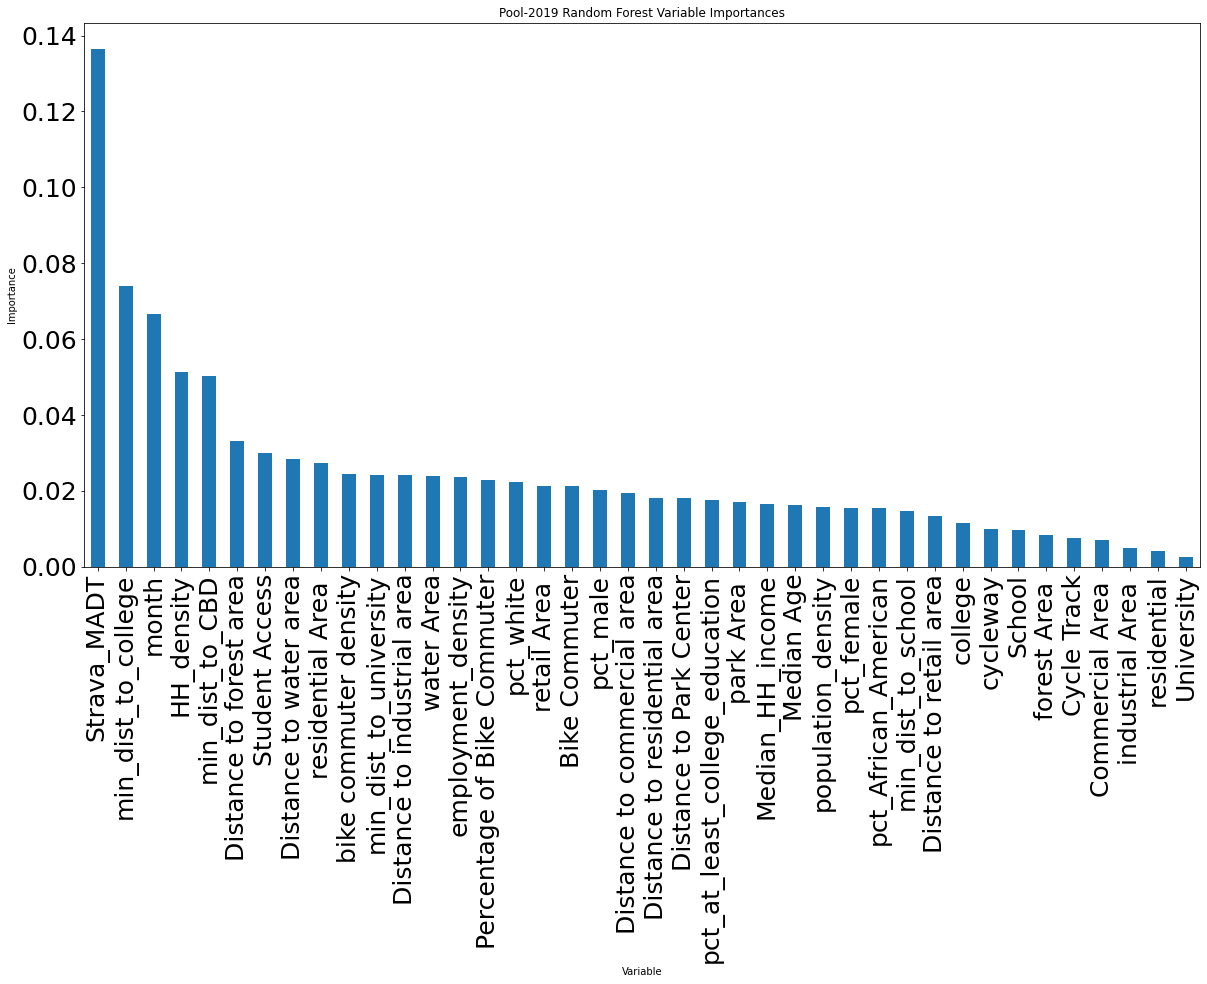

In [35]:
feature_importances_df = pd.DataFrame(brf_model.feature_importances_, index=X_data1.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [37]:
feature_importances_df.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_RF_model_Variable_Importance.csv')

# Apply bike RF Model

In [15]:
# read 
bapp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_application_data.csv')
bapp['Path'] = np.where(bapp['Bicycle_Fa']=='Path', 1, 0)
bapp['bike lane'] = np.where(bapp['Bicycle_Fa']=='bike lane', 1, 0)
bapp['bike route'] = np.where(bapp['Bicycle_Fa']=='bike route', 1, 0)
bapp['Bike Lane'] = np.where(bapp['Bicycle_Fa']=='Bike Lane', 1, 0)
bapp['Cycle Track'] = np.where(bapp['Bicycle_Fa']=='Cycle Track', 1, 0)
bapp['Trail'] = np.where(bapp['Bicycle_Fa']=='Trail', 1, 0)
bapp['Path'] = np.where(bapp['highway']=='Path', 1, 0)
bapp['cycleway'] = np.where(bapp['highway']=='cycleway', 1, 0)
bapp['secondary'] = np.where(bapp['highway']=='secondary', 1, 0)
bapp['tertiary'] = np.where(bapp['highway']=='tertiary', 1, 0)
bapp['primary'] = np.where(bapp['highway']=='primary', 1, 0)
bapp['residential'] = np.where(bapp['highway']=='residential', 1, 0)
bapp['service'] = np.where(bapp['highway']=='service', 1, 0)
bapp['trunk'] = np.where(bapp['highway']=='trunk', 1, 0)
bapp1=bapp[['month','min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [16]:
track=bapp[["ID"]]

In [17]:
bapp.head()

,Unnamed: 0.1,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,1127,37.796165,-122.419490,POLYGON ((-122.4103506127677 37.79611961207228...,3.019345,0.002189,0.249510,0.165813,0.131352,...,0,0,0,0,0,0,1,0,0,0
1,1,2415,37.774200,-122.436295,POLYGON ((-122.42715829014239 37.7741559374201...,4.642047,0.000000,0.687274,0.087677,0.155897,...,0,0,0,0,0,0,1,0,0,0
2,2,2696,33.636400,-117.573600,POLYGON ((-117.5649623942388 33.63601951720258...,30.272075,0.000000,4.698224,0.000000,5.178166,...,0,0,1,1,0,0,0,0,0,0
3,3,2735,37.851585,-122.260410,POLYGON ((-122.25126407202679 37.8515272002856...,3.516737,0.008472,0.261220,0.035638,0.030689,...,0,0,0,0,0,0,0,0,1,0
4,4,3563,32.991085,-117.271470,POLYGON ((-117.26290023488116 32.9906902025036...,77.836301,0.004015,0.124383,0.014682,0.099479,...,0,0,0,0,0,0,1,0,0,0


In [18]:
bapp1.shape

(153, 50)

In [19]:
predictions = brf_model.predict(bapp1)
predictions1 = pd.DataFrame({'Predicted_MADBT': predictions})
pred=pd.concat([bapp1,predictions1, track],axis=1)
pred.head()

,month,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,Distance to residential area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADBT,ID
0,1,3.019345,0.002189,0.249510,0.165813,0.131352,0.000000,1.762761,0.000472,0.490861,...,0,0,0,0,1,0,0,0,344.256287,1127
1,1,4.642047,0.000000,0.687274,0.087677,0.155897,0.000000,1.156915,0.012237,0.460795,...,0,0,0,0,1,0,0,0,1300.499984,2415
2,1,30.272075,0.000000,4.698224,0.000000,5.178166,0.000000,4.852471,0.013678,0.223595,...,1,1,0,0,0,0,0,0,314.575252,2696
3,1,3.516737,0.008472,0.261220,0.035638,0.030689,0.000676,0.355484,0.137718,0.073922,...,0,0,0,0,0,0,1,0,571.929290,2735
4,1,77.836301,0.004015,0.124383,0.014682,0.099479,0.000000,5.174904,0.000000,1.881231,...,0,0,0,0,1,0,0,0,345.518134,3563


In [20]:
pred_save=pred[['ID','month','Predicted_MADBT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_MADBT_Prediction.csv')

In [21]:
pred_save['Predicted_MADBT'].describe()

count     153.000000
mean      439.490694
std       534.279795
min        12.103417
25%       173.674469
50%       317.923667
75%       416.687632
max      2897.756654
Name: Predicted_MADBT, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Predicted_MADBT'>

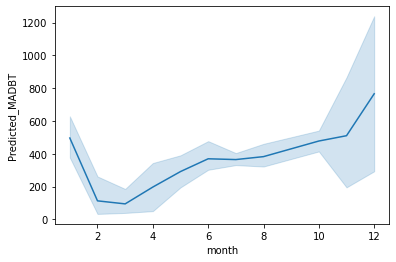

In [22]:
sns.lineplot(data=pred_save, x="month", y="Predicted_MADBT")

# Run Pedestrian RF model for iputation

In [14]:
pdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_data.csv')
pdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0.0,572,2018,1,188.971429,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,572,2018,2,213.142857,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,572,2018,3,235.550000,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,572,2018,4,221.250000,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,572,2018,5,220.435714,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pdata0['ID'].nunique()

208

In [16]:
# lets keep the data that we need for model tunning
pdata=pdata0[['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]
pdata.columns

Index(['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'r

In [38]:
# split data into X dataframe and Y dataframe:
X_data2 = pdata.drop("AASHTO_MADT", axis=1)
Y_data2 = pdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data2.shape} Y_data.shape: {Y_data2.shape}")

X_data.shape: (3788, 50) Y_data.shape: (3788,)


In [39]:
features2 = pdata.drop("AASHTO_MADT", axis=1)
feature_list2 = list(features2.columns)

In [40]:
X2 = np.asarray(X_data2)
Y2 = np.asarray(Y_data2)
print(f"X.shape: {X2.shape} Y.shape: {Y2.shape}")

X.shape: (3788, 50) Y.shape: (3788,)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X2, Y2, test_size=0.2,random_state=94704)

In [33]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-09 00:08:07,477	WARNING util.py:244 -- The `reset` operation took 1.352 s, which may be a performance bottleneck.
2023-05-09 00:08:07,483	WARNING util.py:244 -- The `start_trial` operation took 1.361 s, which may be a performance bottleneck.
2023-05-09 00:08:09,111	WARNING util.py:244 -- The `reset` operation took 1.253 s, which may be a performance bottleneck.
2023-05-09 00:08:09,117	WARNING util.py:244 -- The `start_trial` operation took 1.261 s, which may be a performance bottleneck.
2023-05-09 00:08:10,613	WARNING util.py:244 -- The `reset` operation took 1.175 s, which may be a performance bottleneck.
2023-05-09 00:08:10,620	WARNING util.py:244 -- The `start_trial` operation took 1.184 s, which may be a performance bottleneck.
2023-05-09 00:08:11,783	WARNING util.py:244 -- The `reset` operation took 0.787 s, which may be a performance bottleneck.
2023-05-09 00:08:11,791	WARNING util.py:244 -- The `start_trial` operation took 0.795 s, which may be a performance bottleneck.


C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

2023-05-09 00:17:25,019	WARNING util.py:244 -- The `reset` operation took 1.305 s, which may be a performance bottleneck.
2023-05-09 00:17:25,026	WARNING util.py:244 -- The `start_trial` operation took 1.312 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000002DF69566E20> pid=13548) 2023-05-09 00:17:25,641	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_4372afb16961451e8da53e094058ba15
(<ray.tune.trainable.util._Trainable object at 0x000002DF69566E20> pid=13548) 2023-05-09 00:17:25,641	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 93, '_timesteps_total': None, '_time_total': 60.800923585891724, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x000001868A597E50> pid=23740) 2023-05-09 00:17:25,690	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_bff7c0044a8848f496

2023-05-09 00:17:40,253	WARNING util.py:244 -- The `reset` operation took 1.299 s, which may be a performance bottleneck.
2023-05-09 00:17:40,259	WARNING util.py:244 -- The `start_trial` operation took 1.309 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000001BECA517DF0> pid=23612) 2023-05-09 00:17:41,068	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_ebc9ef150e564a0c9aa01c1a7babb6b7
(<ray.tune.trainable.util._Trainable object at 0x000001BECA517DF0> pid=23612) 2023-05-09 00:17:41,068	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 98, '_timesteps_total': None, '_time_total': 62.11410713195801, '_episodes_total': None}
2023-05-09 00:17:42,001	WARNING util.py:244 -- The `reset` operation took 1.031 s, which may be a performance bottleneck.
2023-05-09 00:17:42,007	WARNING util.py:244 -- The `start_trial` operation took 1.038 s, which may be a performance

In [34]:
tune_model.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [42]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=pdata.loc[pdata['month']!=i]
    test=pdata.loc[pdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 198.7513132297782	Score Loss: 256.8036872374919
	Train RMSE: 635.8617698135857	Score RMSE: 596.4101856396331
	Train MAPE: 379.56727423421063	Score MAPE: 394.4851792251411
	Train R2:   0.8355621121287589	Score R2: 0.46808474317744264

	3-VOLUME SCORES: LOW (n=187), MED (n=88), HIGH (n=23), TOTAL IN Month (n=298)
	Low Loss: 161.18104842780983	Med Loss: 291.55661645326296	High Loss: 901.2895866471748
	Low RMSE: 461.14860150807607	Med RMSE: 653.3202531750803	High RMSE: 1116.5214507401654
	Low MAPE: 229.50804080909825	Med MAPE: 76.1303349348252	High MAPE: 48.142899793576724
	Low R2:   -38.72052259026024	Med R2: -14.889151362055577	High R2: -14.889151362055577


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 197.45137358849732	Score Loss: 256.11465636629595
	Train RMSE: 630.7998004078353	Score RMSE: 820.0197572023679
	Train MAPE: 368.53727122540374	Score MAPE: 418.1113786005439
	Train R2:   0.8257073065459859	Score R2: 0.7516227436090457

	3-VOLUME SCORES: LOW (n=194), MED (n=104), HIGH (n=26), TOTAL IN Month (n=324)
	Low Loss: 134.98286211850566	Med Loss: 184.91636555097068	High Loss: 1444.7373613226478
	Low RMSE: 410.2248507311222	Med RMSE: 315.7600576950966	High RMSE: 2593.27280738281
	Low MAPE: 242.11847021883185	Med MAPE: 49.05511028026681	High MAPE: 91.50258986376758
	Low R2:   -27.673753784024765	Med R2: -2.0565641919579294	High R2: -2.0565641919579294


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 196.43268740545716	Score Loss: 248.75684739442252
	Train RMSE: 622.2003027063149	Score RMSE: 684.572852296367
	Train MAPE: 378.97464155442844	Score MAPE: 326.01927372964957
	Train R2:   0.8424500053027216	Score R2: 0.4053492270118164

	3-VOLUME SCORES: LOW (n=188), MED (n=97), HIGH (n=29), TOTAL IN Month (n=314)
	Low Loss: 139.97251917648825	Med Loss: 237.46198050202324	High Loss: 991.7587713094008
	Low RMSE: 373.65539560049854	Med RMSE: 613.6846314307812	High RMSE: 1705.706952339953
	Low MAPE: 209.54444868742885	Med MAPE: 59.29658308538299	High MAPE: 53.88723504508653
	Low R2:   -21.651334486537063	Med R2: -11.450649641428349	High R2: -11.450649641428349


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 198.46722404566677	Score Loss: 204.88524135004226
	Train RMSE: 630.276956579617	Score RMSE: 570.6720621421317
	Train MAPE: 373.790228508112	Score MAPE: 319.3014371266146
	Train R2:   0.8214477305121612	Score R2: 0.9036499637434982

	3-VOLUME SCORES: LOW (n=167), MED (n=105), HIGH (n=37), TOTAL IN Month (n=309)
	Low Loss: 54.297314657183044	Med Loss: 203.3608252599525	High Loss: 888.8919291113106
	Low RMSE: 92.1491326274735	Med RMSE: 567.5355829543562	High RMSE: 1329.4253882926748
	Low MAPE: 103.15147010563011	Med MAPE: 52.63759970636856	High MAPE: 89.61813618360051
	Low R2:   -0.9831861048702666	Med R2: -8.750989952917426	High R2: -8.750989952917426


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 192.68500822864857	Score Loss: 280.35862256360633
	Train RMSE: 616.6808573711714	Score RMSE: 894.025914430854
	Train MAPE: 369.50223644249957	Score MAPE: 365.37959987286854
	Train R2:   0.8337517309260594	Score R2: 0.6993296365145918

	3-VOLUME SCORES: LOW (n=174), MED (n=103), HIGH (n=41), TOTAL IN Month (n=319)
	Low Loss: 102.90503656602941	Med Loss: 198.81114372063038	High Loss: 1241.2158537916189
	Low RMSE: 306.9724177184873	Med RMSE: 419.31614901487734	High RMSE: 2318.738689727441
	Low MAPE: 181.96308611489863	Med MAPE: 53.048795350038326	High MAPE: 94.36834507458254
	Low R2:   -17.11480942156226	Med R2: -5.3411619690581205	High R2: -5.3411619690581205


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 190.00158185998023	Score Loss: 290.75150132297495
	Train RMSE: 585.2003081105926	Score RMSE: 1218.5001922635604
	Train MAPE: 369.97461664007653	Score MAPE: 330.5780359321666
	Train R2:   0.843598203102546	Score R2: 0.6043020037360504

	3-VOLUME SCORES: LOW (n=166), MED (n=106), HIGH (n=40), TOTAL IN Month (n=312)
	Low Loss: 114.16848545270425	Med Loss: 177.37137321322012	High Loss: 1324.0283566754485
	Low RMSE: 339.72267610005673	Med RMSE: 342.95518003201653	High RMSE: 3284.866377256917
	Low MAPE: 170.60896616406063	Med MAPE: 50.1953084295377	High MAPE: 94.43578595644401
	Low R2:   -22.10714840888367	Med R2: -2.560288523086385	High R2: -2.560288523086385


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 190.42758184781928	Score Loss: 310.3049903543975
	Train RMSE: 623.1362290879603	Score RMSE: 810.5712605886146
	Train MAPE: 369.09374672587995	Score MAPE: 369.1365351000935
	Train R2:   0.8395536499278723	Score R2: 0.45867145724874503

	3-VOLUME SCORES: LOW (n=166), MED (n=103), HIGH (n=48), TOTAL IN Month (n=317)
	Low Loss: 198.2596595613586	Med Loss: 139.01069261434137	High Loss: 1065.3641065808608
	Low RMSE: 601.2250432838	Med RMSE: 221.57348368681062	High RMSE: 1727.3301024462542
	Low MAPE: 315.6934018725819	Med MAPE: 48.96784262875318	High MAPE: 64.38119464071283
	Low R2:   -68.39092780958569	Med R2: -0.43699441708944464	High R2: -0.43699441708944464


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 187.90478252178482	Score Loss: 288.7271692803471
	Train RMSE: 577.350461172125	Score RMSE: 1031.5183451365483
	Train MAPE: 365.54311838294393	Score MAPE: 388.3827682515936
	Train R2:   0.8465935541703479	Score R2: 0.7244248336595644

	3-VOLUME SCORES: LOW (n=172), MED (n=113), HIGH (n=41), TOTAL IN Month (n=326)
	Low Loss: 113.8780682779236	Med Loss: 201.62718532445868	High Loss: 1262.29652438845
	Low RMSE: 303.2723541711176	Med RMSE: 349.8944616001353	High RMSE: 2781.559965293997
	Low MAPE: 227.49846003971666	Med MAPE: 53.190173436525235	High MAPE: 88.3586098161489
	Low R2:   -16.149744478108317	Med R2: -2.8017218478269448	High R2: -2.8017218478269448


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 192.60858103551806	Score Loss: 258.0475436707131
	Train RMSE: 607.7506283096754	Score RMSE: 906.3173523313169
	Train MAPE: 368.1596810111694	Score MAPE: 356.7422304444582
	Train R2:   0.8280855356174711	Score R2: 0.8076334893423829

	3-VOLUME SCORES: LOW (n=169), MED (n=96), HIGH (n=37), TOTAL IN Month (n=303)
	Low Loss: 83.53338743263546	Med Loss: 160.47340737500636	High Loss: 1312.0840106490673
	Low RMSE: 151.60072269239043	Med RMSE: 296.1619935964887	High RMSE: 2528.58816620925
	Low MAPE: 149.26441951319114	Med MAPE: 51.85453017132322	High MAPE: 95.8019369757102
	Low R2:   -3.298674807715396	Med R2: -1.6132459204042195	High R2: -1.6132459204042195


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 199.28554827871554	Score Loss: 196.2954849227615
	Train RMSE: 628.17505517367	Score RMSE: 604.2872469591027
	Train MAPE: 368.20905605077826	Score MAPE: 404.5031463346226
	Train R2:   0.8243714114999966	Score R2: 0.8809104956560931

	3-VOLUME SCORES: LOW (n=203), MED (n=96), HIGH (n=36), TOTAL IN Month (n=335)
	Low Loss: 109.63441563379793	Med Loss: 162.58119380273467	High Loss: 774.8724019555998
	Low RMSE: 427.5993526434323	Med RMSE: 364.51398164699293	High RMSE: 1418.6975965341446
	Low MAPE: 194.5213015908395	Med MAPE: 52.61269595294359	High MAPE: 84.71024132715773
	Low R2:   -32.134518388278906	Med R2: -3.4566099354923265	High R2: -3.4566099354923265


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 204.79068721768755	Score Loss: 160.4537702189586
	Train RMSE: 636.3993104933594	Score RMSE: 419.11192402532714
	Train MAPE: 371.6925290074655	Score MAPE: 417.9949748931283
	Train R2:   0.8359782299057615	Score R2: 0.7435332956538363

	3-VOLUME SCORES: LOW (n=210), MED (n=81), HIGH (n=30), TOTAL IN Month (n=322)
	Low Loss: 106.0460401550498	Med Loss: 178.5454700825531	High Loss: 497.2893587815206
	Low RMSE: 333.90804819039596	Med RMSE: 432.26527862624584	High RMSE: 774.8467943005644
	Low MAPE: 208.33626785374074	Med MAPE: 58.585681681800686	High MAPE: 59.77542846738307
	Low R2:   -19.694725946521466	Med R2: -4.8095709252971295	High R2: -4.8095709252971295


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_9852\3911164768.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=40,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 203.1253078987573	Score Loss: 245.51446574514372
	Train RMSE: 641.7714716205704	Score RMSE: 561.2634441695013
	Train MAPE: 377.0011552583917	Score MAPE: 435.2611967870255
	Train R2:   0.8333357789890536	Score R2: 0.45615555309692724

	3-VOLUME SCORES: LOW (n=206), MED (n=74), HIGH (n=28), TOTAL IN Month (n=309)
	Low Loss: 183.67441484489822	Med Loss: 246.46971559111557	High Loss: 706.1707468914489
	Low RMSE: 531.5794107812848	Med RMSE: 422.61909977703795	High RMSE: 961.9957096726683
	Low MAPE: 276.10770309014435	Med MAPE: 65.90344103873707	High MAPE: 69.01024195523489
	Low R2:   -51.981495006283346	Med R2: -7.477594010552327	High R2: -7.477594010552327


Low MAE Average: 125.21110435869866 +/- 39.248080588652805
Low RMSE Average: 361.08816717067793 +/- 137.66528852464486
Low MAPE Average: 209.0263363383469 +/- 53.95523611131076
Low R2 Average: -26.65840343605262 +/- 18.3939739213186

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

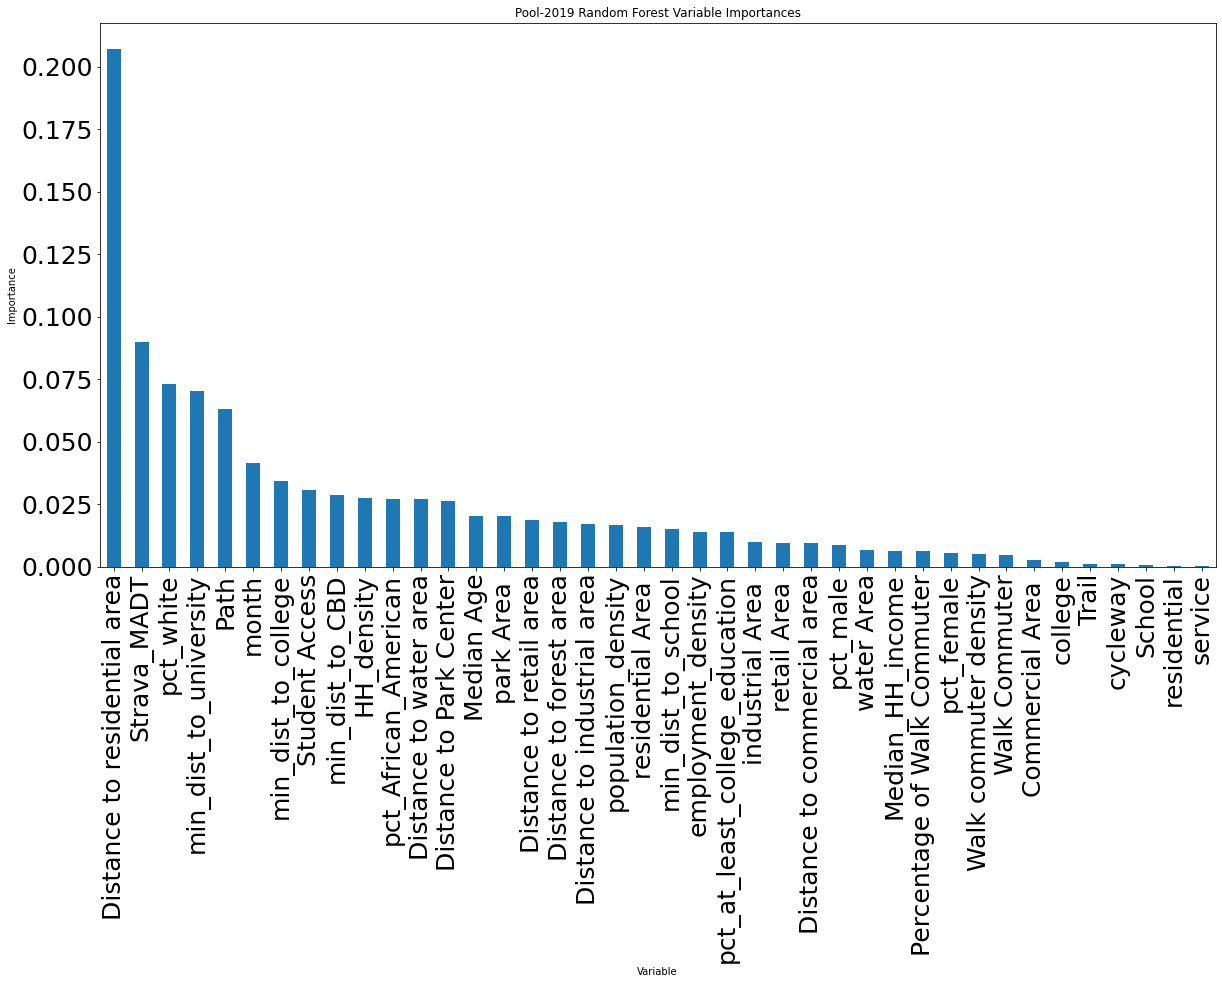

In [43]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features2, round(importance, 4)) for feature, importance in zip(feature_list2, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances_dfb = pd.DataFrame(brf_model.feature_importances_, index=X_data2.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_dfb[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [44]:
feature_importances_dfb.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_RF_model_Variable_Importance.csv')

# Apply Pedestrian RF Model

In [22]:
# read 
papp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_application_data.csv')
papp1=papp[['month',  'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [24]:
papp['ID'].nunique()

74

In [49]:
check=papp.loc[papp['ID']==62864]
check

,Unnamed: 0.1,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
87,87,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
88,88,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
89,89,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
90,90,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
91,91,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
92,92,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
93,93,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
94,94,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
95,95,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0


In [44]:
track=papp[["ID"]]

In [45]:
predictions = brf_model.predict(papp1)
predictions1 = pd.DataFrame({'Predicted_MADPT': predictions})
pred=pd.concat([papp1,predictions1, track],axis=1)
pred.head()

,month,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,Distance to residential area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADPT,ID
0,1,30.272075,0.0,4.980704,0.0,5.164795,0.0,4.968207,0.00945,0.206389,...,0,0,0,0,0,0,0,0,1002.219279,2696
1,1,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,516.429516,2698
2,2,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,578.387456,2698
3,3,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,493.364835,2698
4,4,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,496.699893,2698


In [46]:
pred_save=pred[['ID','month','Predicted_MADPT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_MADPT_Prediction.csv')

In [47]:
pred_save['Predicted_MADPT'].describe()

count     200.000000
mean      617.354570
std       688.766511
min        43.245905
25%       280.852661
50%       320.199945
75%       689.243127
max      4946.994360
Name: Predicted_MADPT, dtype: float64

# End of the Modeling